In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [3]:
x = np.random.rand(100,1)
x = np.sort(x,axis=0)
y = 5*x*x+0.1*np.random.randn(100,1)

In [4]:
x.shape

(100, 1)

In [5]:
# Set up the design matrix X 
X = np.zeros((len(x),3))

X[:,0] = 1
X[:,1] = x.reshape(100)
X[:,2] = x.reshape(100)**2

#print(X)

In [6]:
X.shape

(100, 3)

In [7]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
ytilde = X @ beta

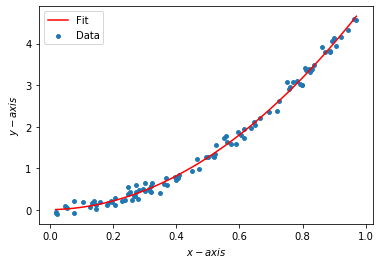

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$x-axis$')
ax.set_ylabel(r'$y-axis$')
ax.scatter(x, y, label = 'Data', s = 15)
ax.plot(x, ytilde,'r-', label = 'Fit')
ax.legend()

plt.show()

In [8]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_model)) ** 2)

print(R2(y, ytilde))

0.9945624783158745


In [9]:
def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(y, ytilde))

0.010565283361473712


In [10]:
def RelativeError(y_data, y_model):
    return abs((y_data-y_model)/y_data)
#print(RelativeError(y, ytilde))

In [11]:
# Ridge

In [12]:
_lambda = 0.1

In [13]:
betaridge = np.linalg.inv(X.T.dot(X)+(_lambda*np.eye(len(X[0])))).dot(X.T).dot(y)
yridge = X @ betaridge

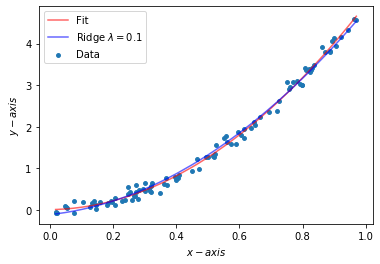

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$x-axis$')
ax.set_ylabel(r'$y-axis$')
ax.scatter(x, y, label = 'Data', s = 15)
ax.plot(x, ytilde,'r-', alpha = 0.6, label = 'Fit')
ax.plot(x, yridge, 'b-', alpha = 0.6, label = 'Ridge $\lambda = 0.1$')
ax.legend()

plt.show()

In [39]:
np.var(beta)

5.0881071717017425

In [38]:
np.var(betaridge)

3.242409648921118

In [25]:
# Using SkLearn

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)



In [26]:
linreg = skl.LinearRegression().fit(x_poly,y)
ytilde1 = linreg.predict(x_poly)

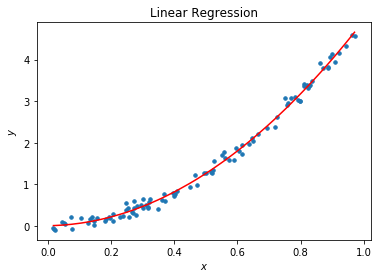

In [27]:
plt.scatter(x, y, s=12)
plt.plot(x, ytilde1, color='r')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression')

plt.show()

In [64]:
beta0 = linreg.intercept_
beta1 = linreg.coef_

In [72]:
beta1

array([[0.        , 0.09882883, 4.83651825]])

In [28]:
# Ridge SKlearn

In [29]:
_lambda = 0.1

In [30]:
clf_ridge = skl.Ridge(alpha=_lambda).fit(x_poly, y)
yridge1 = clf_ridge.predict(x_poly)

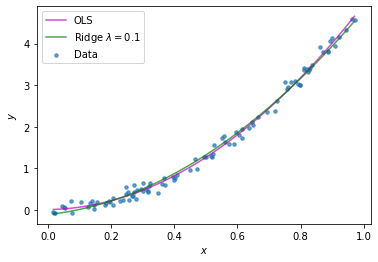

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.scatter(x, y, alpha=0.7, s=12,
            label='Data')
ax.plot(x, ytilde1, alpha=0.7, c='m',
            label='OLS')
ax.plot(x, yridge1, alpha=0.7, c='g',
            label='Ridge $\lambda = 0.1$')
ax.legend()
plt.show()

In [ ]:
# Lasso 

In [54]:
clf_lasso = skl.Lasso(alpha=0.05).fit(x_poly, y)
ylasso1 = clf_lasso.predict(x_poly)

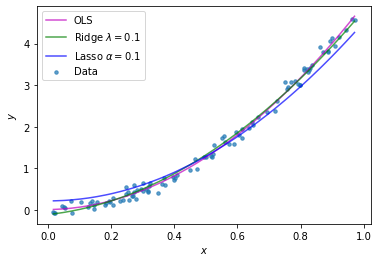

In [55]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.scatter(x, y, alpha=0.7, s=12,
            label='Data')
ax.plot(x, ytilde1, alpha=0.7, c='m',
            label='OLS')
ax.plot(x, yridge1, alpha=0.7, c='g',
            label='Ridge $\lambda = 0.1$')
ax.plot(x, ylasso1, alpha=0.7, c='b',
            label=r'Lasso $\alpha = 0.1$')
ax.legend()
plt.show()

In [78]:
print("Mean squared error OLS: %.4f" % mean_squared_error(y, ytilde1))
print("Mean squared error Ridge: %.4f" % mean_squared_error(y, yridge1))

Mean squared error OLS: 0.0106
Mean squared error Ridge: 0.0130


In [79]:
print('Variance score OLS: %.4f' % r2_score(y, ytilde1))
print('Variance score Ridge: %.4f' % r2_score(y,yridge1))

Variance score OLS: 0.9946
Variance score Ridge: 0.9933


In [80]:
print('Mean absolute error OLS: %.4f' % mean_absolute_error(y, ytilde1))
print('Mean absolute error Ridge: %.4f' % mean_absolute_error(y, yridge1))

Mean absolute error OLS: 0.0835
Mean absolute error Ridge: 0.0923
